In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import math

In [2]:
tweets_sentiments = pd.read_csv('../data/interim/bitcoin_all_tweets_sentiments_merged_20210101-20210930.csv', index_col = 0)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
#1107812/1107811
#tweets_sentiments = pd.read_csv('../data/interim/bitcoin_all_tweets_sentiments_20210101-20210930.csv', index_col = 0)
#tweets_sentiments_next = pd.read_csv('../data/interim/bitcoin_all_tweets_sentiments_20210101-20210531.csv', index_col = 0)
#tweets_sentiments_next = tweets_sentiments_next[1107811:]
#tweets_sentiments_full = pd.concat([tweets_sentiments, tweets_sentiments_next])

#filename = '../data/interim/bitcoin_all_tweets_sentiments_merged_20210101-20210930.csv'
#tweets_sentiments_full.to_csv(filename, mode='w')


In [4]:
tweets_sentiments


,id,date,text,hashtags,replyCount,retweetCount,likeCount,userName,userFollowerCount,userFavCount,userFriendCount,dateTime,textLength,prediction,negative,neutral,positive
0,1443727347832791045,2021-09-30 23:59:57+00:00,btc ends q3 +26.7%,NaN,2.0,0.0,45.0,tier10k,6614.0,4029.0,1620.0,2021-09-30 23:59:57+00:00,18,neutral,0.0145,0.7970,0.1886
1,1443727346670845993,2021-09-30 23:59:57+00:00,exchange or exchange of new crypto assets usua...,"['euler', 'bsc', 'crypto', 'ethereum']",0.0,1.0,1.0,Rofiqul52509717,3311.0,5963.0,4968.0,2021-09-30 23:59:57+00:00,197,positive,0.0021,0.2555,0.7424
2,1443727338575958019,2021-09-30 23:59:55+00:00,returns over the last 10 years: bitcoin $btc: ...,NaN,0.0,0.0,1.0,iamfkr2,8.0,152.0,151.0,2021-09-30 23:59:55+00:00,266,negative,0.6298,0.3230,0.0472
3,1443727338169114633,2021-09-30 23:59:55+00:00,this whale isn't afraid of why should you be? ...,"['chinafud', 'bitcoin', 'cryptocurrency', 'cry...",0.0,0.0,0.0,welcomecatena,1409.0,8538.0,2099.0,2021-09-30 23:59:55+00:00,50,neutral,0.1539,0.7342,0.1119
4,1443727335878967296,2021-09-30 23:59:54+00:00,current bitcoin transaction fees: bch next blo...,NaN,0.0,0.0,0.0,BitcoinFeesCash,596.0,374.0,392.0,2021-09-30 23:59:54+00:00,117,neutral,0.1366,0.8302,0.0332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16678161,1362914869373243396,2021-02-20 00:00:01+00:00,btc/usd | $btcusd | $btc $usd btc in bullish c...,NaN,0.0,0.0,2.0,IdeasPrime,7037.0,0.0,0.0,2021-02-20 00:00:01+00:00,89,neutral,0.0357,0.9171,0.0471
16678162,1362914869129973760,2021-02-20 00:00:01+00:00,increase wealth with our btc spot cruiser | qu...,"['BINANCE', 'trading', 'market', 'moneymanagem...",0.0,0.0,0.0,BeyondFund,42.0,44.0,47.0,2021-02-20 00:00:01+00:00,168,positive,0.0032,0.3496,0.6471
16678163,1362914868861493253,2021-02-20 00:00:01+00:00,"the price of spaghetti alla carbonara is 19,65...","['bitcoin', 'CarbonaraIndex']",0.0,0.0,1.0,BitcoinBellyB,476.0,33013.0,953.0,2021-02-20 00:00:01+00:00,140,neutral,0.0432,0.9307,0.0261
16678164,1362914868144332800,2021-02-20 00:00:00+00:00,criminals are holding btc in bulk.,NaN,0.0,0.0,0.0,fedupoffed,121.0,8555.0,2599.0,2021-02-20 00:00:00+00:00,34,negative,0.5915,0.3955,0.0129


In [5]:
tweets_sentiments['dateTime']= pd.to_datetime(tweets_sentiments['dateTime'])


In [6]:
tweets_sentiments = tweets_sentiments[['id', 'dateTime', 'prediction']]

tweets_sentiments.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 16400976 entries, 0 to 16678165
Data columns (total 3 columns):
 #   Column      Dtype              
---  ------      -----              
 0   id          int64              
 1   dateTime    datetime64[ns, UTC]
 2   prediction  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 500.5+ MB


In [1317]:
thirty_mins_span = tweets_sentiments.groupby('prediction').resample('30min', on='dateTime').count()

one_h_span = tweets_sentiments.groupby('prediction').resample('1H', on='dateTime').count()

two_h_span = tweets_sentiments.groupby('prediction').resample('2H', on='dateTime').count()

daily_span = tweets_sentiments.groupby('prediction').resample('D', on='dateTime').count()

fifteen_mins_span = tweets_sentiments.groupby('prediction').resample('15min', on='dateTime').count()

In [1318]:
thirty_mins_span = thirty_mins_span.unstack('prediction', fill_value=0)
thirty_mins_span = thirty_mins_span[('id')]

one_h_span = one_h_span.unstack('prediction', fill_value=0)
one_h_span = one_h_span[('id')]

two_h_span = two_h_span.unstack('prediction', fill_value=0)
two_h_span = two_h_span[('id')]

daily_span = daily_span.unstack('prediction', fill_value=0)
daily_span = daily_span[('id')]

fifteen_mins_span = fifteen_mins_span.unstack('prediction', fill_value=0)
fifteen_mins_span = fifteen_mins_span[('id')]


In [1319]:
two_h_span.index.name = None
two_h_span.columns.name = 'index'

#two_h_span.loc['2021-09-10':'2021-09-30']
daily_span.index.name = None
daily_span.columns.name = 'index'

#daily_span.loc['2021-09-10':'2021-09-30']

one_h_span.index.name = None
one_h_span.columns.name = 'index'

thirty_mins_span.index.name = None
thirty_mins_span.columns.name = 'index'


fifteen_mins_span.index.name = None
fifteen_mins_span.columns.name = 'index'



In [1320]:
def calc_percentage(df):
    df['total'] = df['negative'] + df['neutral'] + df['positive']
    df['pos_percent'] = df['positive'] / df['total'] * 100 
    df['neu_percent'] = df['neutral'] / df['total'] * 100
    df['neg_percent'] = df['negative'] / df['total'] * 100

calc_percentage(thirty_mins_span)
calc_percentage(one_h_span)
calc_percentage(two_h_span)
calc_percentage(daily_span)
calc_percentage(fifteen_mins_span)


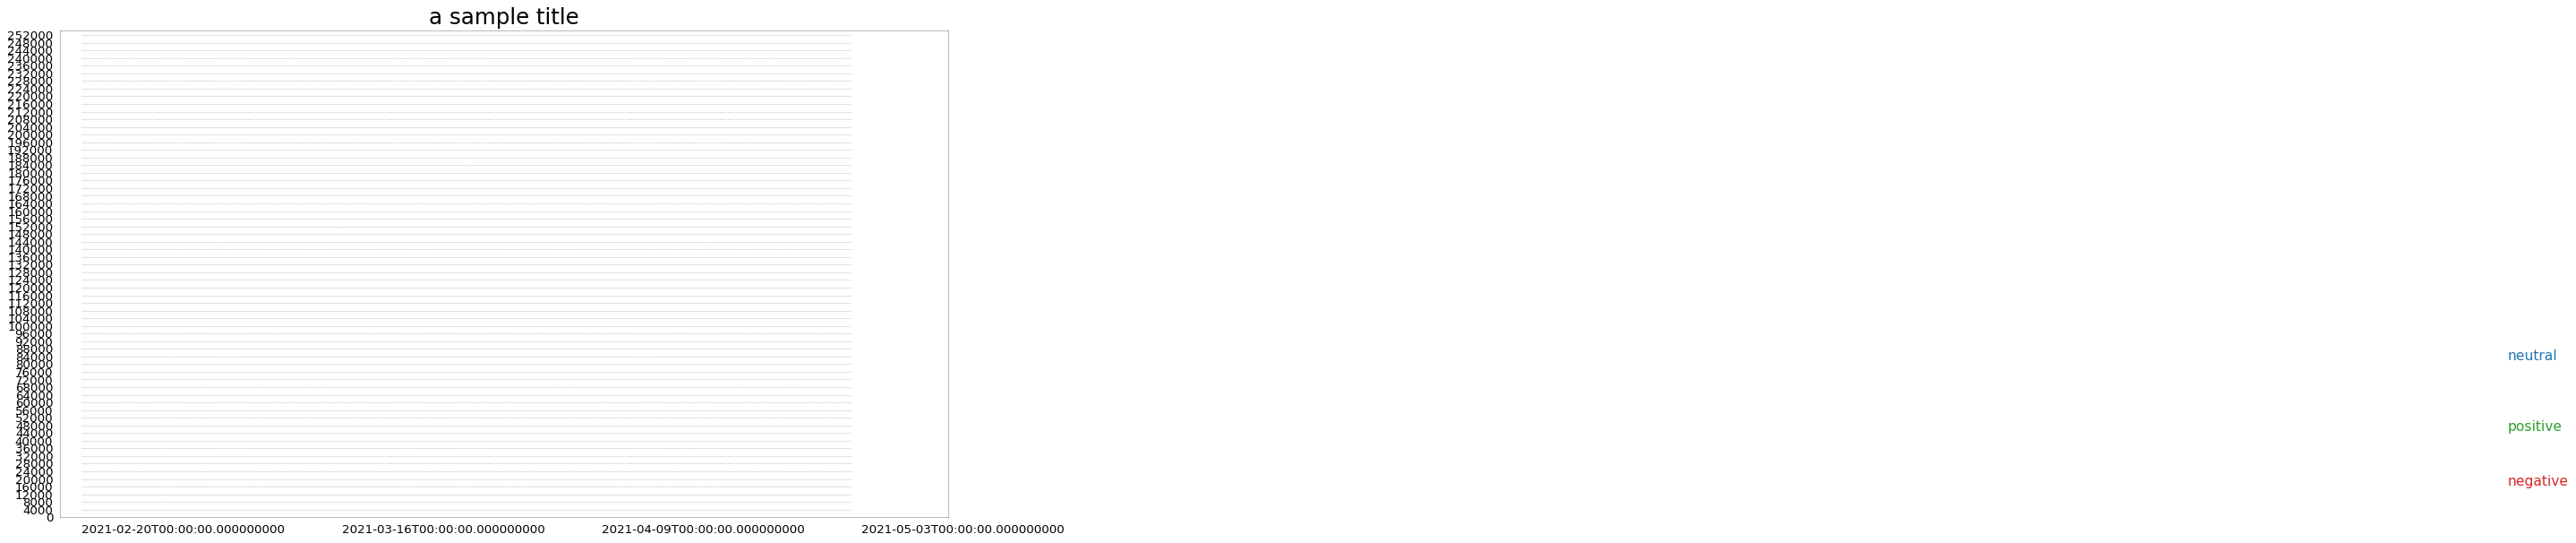

In [1321]:
plot = daily_span

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 0
y_UL = int(plot.iloc[:, 1:].max().max()*1.1)
#y_UL = 50000
y_interval = 4000
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = plot.columns[:3]  
for i, column in enumerate(columns):    
    valt = plot[column].values
    plt.plot(plot.index.values, plot[column].values, lw=1.5, color=mycolors[i])    
    plt.text(plot.shape[0]+1, plot[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('a sample title', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, plot.shape[0], 24), plot.index.values[::24], horizontalalignment='left', fontsize=12)    


plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()

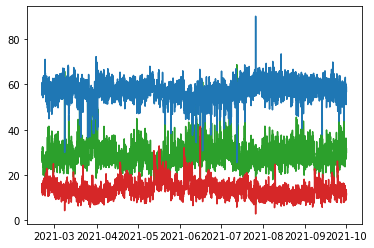

In [1322]:
plot = thirty_mins_span

x = plot.index.values
#pos = plot['positive']
#neu = plot['neutral']
#neg = plot['negative']

pos = plot['pos_percent']
neu = plot['neu_percent']
neg = plot['neg_percent']

mycolors = ['tab:red', 'tab:blue', 'tab:green']    

plt.plot(x,pos, color=mycolors[2])

plt.plot(x,neu, color=mycolors[1])
plt.plot(x,neg, color=mycolors[0])

plt.show()

In [1323]:
thirty_mins_span = thirty_mins_span.reset_index().rename(columns={'index':'datetime'})
one_h_span = one_h_span.reset_index().rename(columns={'index':'datetime'})
two_h_span = two_h_span.reset_index().rename(columns={'index':'datetime'})
daily_span = daily_span.reset_index().rename(columns={'index':'datetime'})
fifteen_mins_span = fifteen_mins_span.reset_index().rename(columns={'index':'datetime'})


In [1324]:
bitcoin_prices = pd.read_csv('../data/external/Bitstamp_BTCUSD_2021_minute_final.csv', header = 1)


In [1325]:
bpd = bitcoin_prices[['date', 'open', 'Volume BTC']]
bpd['date'] = pd.to_datetime(bpd["date"], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True)
#bpd['Date'] = bpd['SPdateTime'].dt.strftime('%Y-%m-%d')
bpd = bpd.set_index('date')
#bpd.reset_index()

bpd.info()
bpd.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 572118 entries, 2022-02-02 07:18:00+00:00 to 2021-01-01 00:01:00+00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   open        572118 non-null  float64
 1   Volume BTC  572118 non-null  float64
dtypes: float64(2)
memory usage: 13.1 MB


/var/folders/qj/zhs6m1zd0dvg_v7rtzjt38n80000gn/T/ipykernel_31832/59260336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpd['date'] = pd.to_datetime(bpd["date"], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True)


,open,Volume BTC
date,,
2022-02-02 07:18:00+00:00,38313.00,1.207183
2022-02-02 07:17:00+00:00,38326.25,1.897339
2022-02-02 07:16:00+00:00,38360.83,1.402947
2022-02-02 07:15:00+00:00,38355.73,0.023387
2022-02-02 07:14:00+00:00,38343.82,0.002370


In [1326]:
import datetime

def fetch_prices(df, span_mins):
    c_dts = df.datetime
    dts_1 = c_dts + datetime.timedelta(minutes=span_mins)
    dts_2 = c_dts + datetime.timedelta(minutes=(span_mins*2))
    dts_3 = c_dts + datetime.timedelta(minutes=(span_mins*3))
    dts_4 = c_dts + datetime.timedelta(minutes=(span_mins*4))

    df['cp'] = bpd.loc[c_dts].reset_index()['open']
    df['1spanp'] = bpd.loc[dts_1].reset_index()['open']
    df['2spanp'] = bpd.loc[dts_2].reset_index()['open']
    df['3spanp'] = bpd.loc[dts_3].reset_index()['open']
    df['4spanp'] = bpd.loc[dts_4].reset_index()['open']

    df['c_p_change'] = (df['1spanp'] - df['cp']) / df['cp']
    df['shift1_p_change'] = (df['2spanp'] - df['1spanp']) / df['1spanp']
    df['c_plus_shift1_p_change'] = (df['2spanp'] - df['cp']) / df['cp']

fetch_prices(thirty_mins_span, 30)
fetch_prices(one_h_span, 60)
fetch_prices(two_h_span, 120)
fetch_prices(fifteen_mins_span, 15)




In [1327]:
def fetch_trade_vol(df, span_mins):
    c_dts = df.datetime
    vols = bpd.resample(str(span_mins) + 'min').sum()['Volume BTC']
    df['vol_btc'] = vols.loc[c_dts].reset_index()['Volume BTC']
    

fetch_trade_vol(thirty_mins_span, 30)
fetch_trade_vol(one_h_span, 60)
fetch_trade_vol(two_h_span, 120)
fetch_trade_vol(fifteen_mins_span, 15)



In [1328]:
def get_df_with_btc_vol_change (df):    
    #vol_diff = df[['vol_btc']].diff(periods = 2)
    vol_perc_diff = df[['vol_btc']].pct_change(periods = 2)
    vol_perc_diff.replace([np.inf, -np.inf], np.nan, inplace=True)
    vol_perc_difs = vol_perc_diff.shift(-1)
    vol_perc_difs.rename(columns={'vol_btc': 'vol_btc_change'}, inplace=True)
    return df.join(vol_perc_difs)

thirty_mins_span = get_df_with_btc_vol_change(thirty_mins_span)
one_h_span = get_df_with_btc_vol_change(one_h_span)
two_h_span = get_df_with_btc_vol_change(two_h_span)
fifteen_mins_span = get_df_with_btc_vol_change(fifteen_mins_span)


In [1329]:
def get_df_with_post_sentiment_change (df):    
    sentiment_diff = df[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 1)
    sent_difs = sentiment_diff.shift(-1)
    sent_difs.rename(columns={'pos_percent': 'pos_post_change', 'neu_percent': 'neu_post_change', 'neg_percent':'neg_post_change'}, inplace=True)
    return df.join(sent_difs)

thirty_mins_span = get_df_with_post_sentiment_change(thirty_mins_span)
one_h_span = get_df_with_post_sentiment_change(one_h_span)
two_h_span = get_df_with_post_sentiment_change(two_h_span)
fifteen_mins_span = get_df_with_post_sentiment_change(fifteen_mins_span)

In [1330]:

thirty_diff = thirty_mins_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 2)
thirty_difs = thirty_diff.shift(-1)
thirty_difs.rename(columns={'pos_percent': 'pos_change', 'neu_percent': 'neu_change', 'neg_percent': 'neg_change'}, inplace=True)
thirty_mins_span_j = thirty_mins_span.join(thirty_difs)


one_h_diff = one_h_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 2)
one_h_difs = one_h_diff.shift(-1)
one_h_difs.rename(columns={'pos_percent': 'pos_change', 'neu_percent': 'neu_change', 'neg_percent': 'neg_change'}, inplace=True)
one_h_span_j = one_h_span.join(one_h_difs)

two_h_diff = two_h_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 2)
two_h_difs = two_h_diff.shift(-1)
two_h_difs.rename(columns={'pos_percent': 'pos_change', 'neu_percent': 'neu_change', 'neg_percent': 'neg_change'}, inplace=True)
two_h_span_j = two_h_span.join(two_h_difs)

fifteen_mins_diff = fifteen_mins_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 2)
fifteen_mins_difs = fifteen_mins_diff.shift(-1)
fifteen_mins_difs.rename(columns={'pos_percent': 'pos_change', 'neu_percent': 'neu_change', 'neg_percent': 'neg_change'}, inplace=True)
fifteen_mins_span_j = fifteen_mins_span.join(fifteen_mins_difs)


In [1331]:
thirty_pdiff = thirty_mins_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 1)
thirty_pdiff.rename(columns={'pos_percent': 'pos_pre_change', 'neu_percent': 'neu_pre_change', 'neg_percent': 'neg_pre_change'}, inplace=True)
thirty_mins_span_j = thirty_mins_span_j.join(thirty_pdiff)

one_h_pdiff = one_h_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 1)
one_h_pdiff.rename(columns={'pos_percent': 'pos_pre_change', 'neu_percent': 'neu_pre_change', 'neg_percent': 'neg_pre_change'}, inplace=True)
one_h_span_j = one_h_span_j.join(one_h_pdiff)

two_h_pdiff = two_h_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 1)
two_h_pdiff.rename(columns={'pos_percent': 'pos_pre_change', 'neu_percent': 'neu_pre_change', 'neg_percent': 'neg_pre_change'}, inplace=True)
two_h_span_j = two_h_span_j.join(two_h_pdiff)

fifteen_mins_pdiff = fifteen_mins_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 1)
fifteen_mins_pdiff.rename(columns={'pos_percent': 'pos_pre_change', 'neu_percent': 'neu_pre_change', 'neg_percent': 'neg_pre_change'}, inplace=True)
fifteen_mins_span_j = fifteen_mins_span_j.join(fifteen_mins_pdiff)


In [1332]:
thirty_mins_span_j[['pos_percent', 'pos_pre_change', 'pos_change', 'pos_post_change', 'vol_btc_change' ]]


index,pos_percent,pos_pre_change,pos_change,pos_post_change,vol_btc_change
0,25.676983,NaN,NaN,3.858882,NaN
1,29.535865,3.858882,0.385194,-3.473689,-0.311117
2,26.062176,-3.473689,-2.115540,1.358149,-0.522169
3,27.420325,1.358149,1.255500,-0.102649,-0.316275
4,27.317676,-0.102649,1.677766,1.780415,0.297109
...,...,...,...,...,...
10699,29.566453,0.724502,2.724504,2.000002,0.285888
10700,31.566456,2.000002,2.311636,0.311633,0.372999
10701,31.878089,0.311633,-0.541039,-0.852673,-0.564407
10702,31.025416,-0.852673,-1.828420,-0.975747,0.525759


In [1333]:
def assign_shift_target(df):
    df['curr_up'] = np.where(df['1spanp'] >  df['cp'], 1, 0)
    df['shift1_up'] = np.where(df['2spanp'] >  df['1spanp'], 1, 0)
    
    df['shift2_up'] = np.where(df['3spanp'] >  df['2spanp'], 1, 0)
    df['shift3_up'] = np.where(df['4spanp'] >  df['3spanp'], 1, 0)
    df['2_up'] = np.where(df['2spanp'] >  df['cp'], 1, 0)
    df['3_up'] = np.where(df['3spanp'] >  df['cp'], 1, 0)
    df['4_up'] = np.where(df['4spanp'] > df['cp'], 1, 0)
    df['future2_up'] = np.where(df['3spanp'] >  df['1spanp'], 1, 0)
    df['future3_up'] = np.where(df['4spanp'] >  df['1spanp'], 1, 0)

assign_shift_target(thirty_mins_span_j)
assign_shift_target(one_h_span_j)
assign_shift_target(two_h_span_j)
assign_shift_target(fifteen_mins_span_j)

In [1334]:
one_h_span_j[['pos_percent', 'neu_percent', 'neg_percent']]

index,pos_percent,neu_percent,neg_percent
0,27.522704,57.391524,15.085772
1,26.690788,59.922071,13.387142
2,28.179790,57.889704,13.930507
3,27.097204,58.754993,14.147803
4,27.441541,58.253095,14.305365
...,...,...,...
5347,29.318418,57.882414,12.799168
5348,28.892308,58.000000,13.107692
5349,29.208633,57.841727,12.949640
5350,31.719128,56.698951,11.581921


In [1335]:
import pytz
def filter_time(df):
    #pacific = pytz.timezone('US/Pacific')
    #pacific_dt = df.set_index('datetime').tz_convert(pacific)
    return df#[(pacific_dt.index.hour < 0) | (pacific_dt.index.hour > 3)]

def filter_columns(df):
    return df[['datetime', 'total', 'pos_percent', 'neu_percent', 'neg_percent', 'vol_btc', 'vol_btc_change', 'pos_change', 'neu_change', 'neg_change', 
    'pos_pre_change', 'neu_pre_change', 'neg_pre_change', 'curr_up', 
    'pos_post_change', 'neu_post_change', 'neg_post_change',
    'c_plus_shift1_p_change', 'shift1_p_change', 'c_p_change',
    'shift1_up', 'shift2_up', 'shift3_up', "2_up", "3_up", "4_up", "future2_up", "future3_up"]]

thirty_mins_span_final = filter_time(filter_columns(thirty_mins_span_j))
one_h_span_final = filter_time(filter_columns(one_h_span_j))
two_h_span_final = filter_time(filter_columns(two_h_span_j))
fifteen_mins_span_final = filter_time(filter_columns(fifteen_mins_span_j))




In [1336]:
one_h_span_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5352 entries, 0 to 5351
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   datetime                5352 non-null   datetime64[ns, UTC]
 1   total                   5352 non-null   int64              
 2   pos_percent             5352 non-null   float64            
 3   neu_percent             5352 non-null   float64            
 4   neg_percent             5352 non-null   float64            
 5   vol_btc                 5352 non-null   float64            
 6   vol_btc_change          5350 non-null   float64            
 7   pos_change              5350 non-null   float64            
 8   neu_change              5350 non-null   float64            
 9   neg_change              5350 non-null   float64            
 10  pos_pre_change          5351 non-null   float64            
 11  neu_pre_change          5351 non-null   flo

In [1337]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    TimeSeriesSplit,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler


In [1338]:
#thirty_mins_span_final.shape
#one_h_span_final.shape
#two_h_span.shape


In [1339]:

thirty_train_df = thirty_mins_span_final[:math.floor(thirty_mins_span_final.shape[0] * 0.65)]
thirty_test_df = thirty_mins_span_final[math.floor(thirty_mins_span_final.shape[0] * 0.65):]

one_h_train_df = one_h_span_final[:math.floor(one_h_span_final.shape[0] * 0.65)]
one_h_test_df = one_h_span_final[math.floor(one_h_span_final.shape[0] * 0.65):]

two_h_train_df = two_h_span_final[:math.floor(two_h_span_final.shape[0] * 0.65)]
two_h_test_df = two_h_span_final[math.floor(two_h_span_final.shape[0] * 0.65):]

fifteen_mins_train_df = fifteen_mins_span_final[:math.floor(fifteen_mins_span_final.shape[0] * 0.65)]
fifteen_mins_test_df = fifteen_mins_span_final[math.floor(fifteen_mins_span_final.shape[0] * 0.65):]


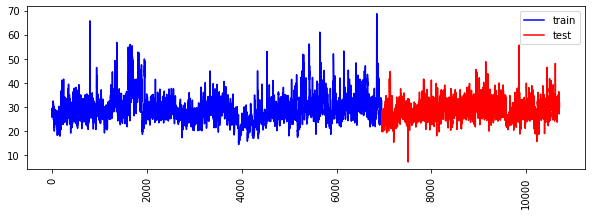

In [1340]:
plt.figure(figsize=(10, 3))

plt.plot(thirty_train_df['pos_percent'], "b", label="train")
plt.plot(thirty_test_df['pos_percent'], "r", label="test")
plt.xticks(rotation="vertical")
plt.legend();

In [1348]:
numeric_features = [
    "pos_pre_change",
    "neu_pre_change",
    "neg_pre_change",
    "pos_change",
    "neu_change",
    "neg_change",
    "neu_post_change",
    "pos_post_change",
    "neg_post_change",
    "pos_percent",
    "neu_percent",
    "neg_percent",
    "total",
    "vol_btc_change"
]
categorical_features = [
    
]
drop_features = [
    #targets
    "shift2_up",
    "shift3_up",
    "2_up",
    "3_up",
    "4_up",
    "future2_up",
    "future3_up",
    #"total",
    #unused features
    "curr_up",
    "shift1_up",
    "datetime",
    "vol_btc",
    "c_plus_shift1_p_change",
    #"vol_btc_change",
    "c_p_change",
    "shift1_p_change",
]

selected_train_df = one_h_train_df
selected_test_df = one_h_test_df
prediction_target = "shift2_up"


In [1349]:
def preprocess_features(
    train_df,
    test_df,
    numeric_features,
    categorical_features,
    drop_features,
    target
):

    all_features = set(numeric_features + categorical_features + drop_features)
    if set(train_df.columns) != all_features:
        print("Missing columns", set(train_df.columns) - all_features)
        print("Extra columns", all_features - set(train_df.columns))
        raise Exception("Columns do not match")

    numeric_transformer = make_pipeline(
        SimpleImputer(strategy="median"), StandardScaler()
    )
    '''categorical_transformer = make_pipeline(
        #SimpleImputer(strategy="constant", fill_value="?"),
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore", sparse=False),
    )'''

    preprocessor = make_column_transformer(
        (numeric_transformer, numeric_features),
        #(categorical_transformer, categorical_features),
        ("drop", drop_features),
    )
    preprocessor.fit(train_df)
    '''ohe_feature_names = (
        preprocessor.named_transformers_["pipeline-2"]
        .named_steps["onehotencoder"]
        .get_feature_names()
        .tolist()
    )'''
    #new_columns = numeric_features + ohe_feature_names
    new_columns = numeric_features
    X_train_enc = pd.DataFrame(
        preprocessor.transform(train_df), index=train_df.index, columns=new_columns
    )
    X_test_enc = pd.DataFrame(
        preprocessor.transform(test_df), index=test_df.index, columns=new_columns
    )

    y_train = train_df[target]
    y_test = test_df[target]

    return X_train_enc, y_train, X_test_enc, y_test, preprocessor

In [1350]:
X_train_enc, y_train, X_test_enc, y_test, preprocessor = preprocess_features(
    selected_train_df,
    selected_test_df,
    numeric_features,
    categorical_features,
    drop_features,
    prediction_target
)

In [1351]:
X_train_enc.head()

,pos_pre_change,neu_pre_change,neg_pre_change,pos_change,neu_change,neg_change,neu_post_change,pos_post_change,neg_post_change,pos_percent,neu_percent,neg_percent,total,vol_btc_change
0,-0.004148,0.032435,-0.004088,-0.006470,0.019242,0.009031,0.956773,-0.278924,-1.009968,-0.329972,0.243165,0.214935,0.498519,-0.018326
1,-0.278943,0.956806,-1.009998,0.170317,0.152652,-0.559250,-0.769244,0.500483,0.322977,-0.490811,0.876599,-0.281593,0.249015,-0.020120
2,0.500465,-0.769215,0.322949,0.105578,-0.359270,0.367595,0.326855,-0.363103,0.129117,-0.202934,0.367867,-0.122761,-0.057652,-0.019502
3,-0.363122,0.326887,0.129090,-0.190048,0.111216,0.180959,-0.190312,0.116083,0.093603,-0.412237,0.584462,-0.059243,-0.147097,-0.019580
4,0.116065,-0.190282,0.093575,0.093360,-0.310190,0.313246,-0.191683,0.005409,0.291696,-0.345664,0.458829,-0.013186,-0.211659,-0.019674


In [1352]:
def score_lr_print_coeff(preprocessor, train_df, y_train, test_df, y_test, X_train_enc):
    lr_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
    lr_pipe.fit(train_df, y_train)
    print("Train score: {:.5f}".format(lr_pipe.score(train_df, y_train)))
    print("Test score: {:.5f}".format(lr_pipe.score(test_df, y_test)))
    lr_coef = pd.DataFrame(
        data=lr_pipe.named_steps["logisticregression"].coef_.flatten(),
        index=X_train_enc.columns,
        columns=["Coef"],
    )
    return lr_coef.sort_values(by="Coef", ascending=False)

In [1353]:
# 30mins, 0930-0720, train 0.55, test 0.53, 1 shift
score_lr_print_coeff(preprocessor, selected_train_df, y_train, selected_test_df, y_test, X_train_enc)

Train score: 0.51265
Test score: 0.53095


,Coef
neu_change,0.166109
neg_pre_change,0.142978
neg_post_change,0.127850
neu_percent,0.030957
pos_pre_change,0.020187
neg_percent,0.020143
pos_post_change,0.018853
total,0.005838
pos_percent,-0.037233
pos_change,-0.064472


# 1h
<strong>Baseline</strong>
shift1_p_change	-0.039855
c_p_change	-0.144066

Train score: 0.53594
Test score: 0.52188 (0.521878	0.542045	0.491753	0.515676)

exp1
neu_change	0.050359
neu_percent	0.039546
total	0.023526
neg_pre_change	0.020287
pos_pre_change	0.008435
neg_percent	0.000579
neu_pre_change	-0.022586
pos_change	-0.024940
pos_percent	-0.030927
neg_change	-0.032724
shift1_p_change	-0.042128
c_p_change	-0.141454

Train score: 0.52904
Test score: 0.52775

exp2 # exp3 removing total, similar performance
neu_change	0.166130
neg_pre_change	0.143150
neg_post_change	0.128084
neu_percent	0.030935
neg_percent	0.020494
pos_pre_change	0.020237
pos_post_change	0.018787
total	0.005685 
pos_percent	-0.037448
pos_change	-0.064544
neu_post_change	-0.102655
neu_pre_change	-0.125137
neg_change	-0.152703

Train score: 0.51380
Test score: 0.53148
(0.531483	0.545635	0.567010	0.556117)

exp4: exp3 add "c_plus_shift1_p_change"
neu_change	0.167490
neg_pre_change	0.134373
neg_post_change	0.112094
neu_percent	0.031275
pos_post_change	0.024933
pos_pre_change	0.022922
neg_percent	0.014270
pos_percent	-0.033594
pos_change	-0.056823
neu_post_change	-0.099405
neu_pre_change	-0.122466
c_plus_shift1_p_change	-0.124876
neg_change	-0.169186

Train score: 0.52990
Test score: 0.52668
(0.526681	0.543547	0.534021	0.538742)

exp5:
neu_change	0.166164
neg_pre_change	0.143318
neg_post_change	0.129633
neu_percent	0.030891
neg_percent	0.020833
pos_pre_change	0.019460
pos_post_change	0.017846
total	0.002587
vol_btc_change	-0.030473
pos_percent	-0.037638
pos_change	-0.065685
neu_post_change	-0.102581
neu_pre_change	-0.124347
neg_change	-0.150595
Train score: 0.51208 Test score: 0.52081
(0.520811	0.535019	0.567010	0.550551)

exp6: updated vol_btc_change from raw to percentage changes
neu_change	0.166109
neg_pre_change	0.142978
neg_post_change	0.127850
neu_percent	0.030957
pos_pre_change	0.020187
neg_percent	0.020143
pos_post_change	0.018853
total	0.005838
pos_percent	-0.037233
pos_change	-0.064472
vol_btc_change	-0.083970
neu_post_change	-0.102580
neu_pre_change	-0.124964
neg_change	-0.152797

Train score: 0.51265
Test score: 0.53095
0.530950	0.544828	0.570103	0.557179


# 30mins
pos_change	0.171143
neg_pre_change	0.130468
neg_post_change	0.126939
neu_post_change	0.091520
vol_btc_change	0.083520
neu_pre_change	0.081115
neu_percent	0.027785
neg_percent	-0.011515
pos_percent	-0.014409
total	-0.016885
neu_change	-0.103645
neg_change	-0.133378
pos_pre_change	-0.145670
pos_post_change	-0.165906
Train score: 0.51603
Test score: 0.51668
(0.516680	0.519724	0.926591	0.665929)


In [1354]:
thresholds = np.arange(0.0, 1.0, 0.1)
lr_pipe1 = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
lr_pipe1.fit(selected_train_df, y_train)

pr_dict = {"threshold": [], "accuracy": [], "precision": [], "recall": [], "f1 score": []}
for threshold in thresholds:
    preds = lr_pipe1.predict_proba(selected_test_df)[:, 1] > threshold
    pr_dict["threshold"].append(threshold)
    pr_dict["accuracy"].append(accuracy_score(y_test, preds))
    pr_dict["precision"].append(precision_score(y_test, preds))
    pr_dict["recall"].append(recall_score(y_test, preds))
    pr_dict["f1 score"].append(f1_score(y_test, preds))

pd.DataFrame(pr_dict)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,accuracy,precision,recall,f1 score
0,0.0,0.517609,0.517609,1.000000,0.682138
1,0.1,0.517609,0.517609,1.000000,0.682138
2,0.2,0.517609,0.517609,1.000000,0.682138
3,0.3,0.517609,0.517609,1.000000,0.682138
4,0.4,0.517609,0.517609,1.000000,0.682138
5,0.5,0.530950,0.544828,0.570103,0.557179
6,0.6,0.482924,1.000000,0.001031,0.002060
7,0.7,0.482391,0.000000,0.000000,0.000000
8,0.8,0.482391,0.000000,0.000000,0.000000
9,0.9,0.482391,0.000000,0.000000,0.000000
